In [1]:
# %matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
df = pd.read_csv('saskatoon-airport-1892-2007.csv')

In [12]:
df[df['Year']<= 1970]

,Date/Time,Year,Month,Mean Max Temp (C),Mean Max Temp Flag,Mean Min Temp (C),Mean Min Temp Flag,Mean Temp (C),Mean Temp Flag,Extr Max Temp (C),...,Total Snow (cm),Total Snow Flag,Total Precip (mm),Total Precip Flag,Snow Grnd Last Day (cm),Snow Grnd Last Day Flag,Dir of Max Gust (10's deg),Dir of Max Gust Flag,Spd of Max Gust (km/h),Spd of Max Gust Flag
0,1892-01,1892,1,NaN,M,NaN,M,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
1,1892-02,1892,2,NaN,M,NaN,M,NaN,M,NaN,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
2,1892-03,1892,3,-3.8,NaN,-19.9,NaN,-11.9,NaN,3.9,...,NaN,M,NaN,M,NaN,NaN,NaN,NaN,NaN,NaN
3,1892-04,1892,4,3.4,NaN,-7.1,NaN,-1.9,NaN,16.7,...,17.8,NaN,17.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1892-05,1892,5,13.1,NaN,-1.3,NaN,5.9,NaN,24.4,...,0.0,NaN,20.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
943,Aug-70,1970,8,25.7,NaN,9.6,NaN,17.7,NaN,36.1,...,0.0,NaN,26.9,NaN,0.0,NaN,29.0,NaN,72.0,NaN
944,Sep-70,1970,9,18.0,NaN,3.7,NaN,10.9,NaN,28.9,...,0.3,NaN,3.0,NaN,0.0,NaN,29.0,NaN,64.0,NaN
945,Oct-70,1970,10,9.9,NaN,-1.8,NaN,4.1,NaN,25.0,...,18.5,NaN,20.6,NaN,0.0,T,32.0,NaN,69.0,NaN
946,Nov-70,1970,11,-3.8,NaN,-10.7,NaN,-7.3,NaN,5.6,...,20.3,NaN,22.1,NaN,8.0,NaN,18.0,NaN,63.0,NaN


In [13]:
cut_off_year = 1970

before = df[df['Year']<= cut_off_year].groupby('Month')['Mean Temp (C)'].mean()

after = df[df['Year']> cut_off_year].groupby('Month')['Mean Temp (C)'].mean()


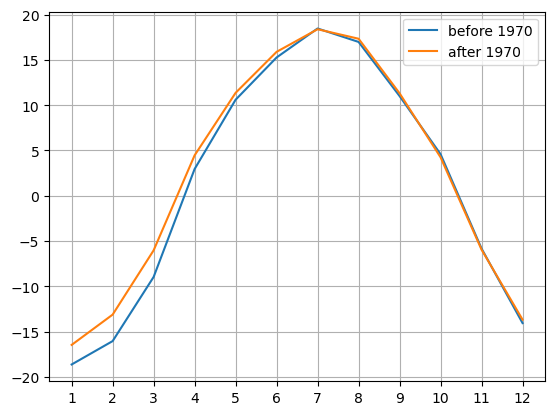

In [14]:
plt.plot(before.index, before, label = f"before {cut_off_year}")
plt.plot(after.index, after, label = f"after {cut_off_year}")
plt.legend()
plt.grid()
plt.xticks(range(1,13))
plt.show()

In [17]:
from scipy.stats import ttest_ind
start_year = df['Year'].min()
end_year = df["Year"].max()
cut_off_year_list = list(range(1970,2000))
for cut_off_year in cut_off_year_list:
    (t, p) = ttest_ind(df.loc[ (df['Year'] < cut_off_year) & (df['Month'] == 1), 'Mean Temp (C)'].dropna(),
                    df.loc[ (df['Year'] > cut_off_year) & (df['Month'] == 1), 'Mean Temp (C)'].dropna())
    if p < 0.05:
        result = "significant change"
    else:
        result = "non-significant change"
    print(f"{start_year}~{cut_off_year} and {cut_off_year}~{end_year}, p_value: {p}, {result}")

1892~1970 and 1970~2007, p_value: 0.03265472702756521, significant change
1892~1971 and 1971~2007, p_value: 0.019213806872235794, significant change
1892~1972 and 1972~2007, p_value: 0.010072719040973344, significant change
1892~1973 and 1973~2007, p_value: 0.011256924905046432, significant change
1892~1974 and 1974~2007, p_value: 0.008192696588013535, significant change
1892~1975 and 1975~2007, p_value: 0.008271656452200434, significant change
1892~1976 and 1976~2007, p_value: 0.01168558801824111, significant change
1892~1977 and 1977~2007, p_value: 0.010684456241746763, significant change
1892~1978 and 1978~2007, p_value: 0.005577454241626053, significant change
1892~1979 and 1979~2007, p_value: 0.003301066590896006, significant change
1892~1980 and 1980~2007, p_value: 0.002649858530094199, significant change
1892~1981 and 1981~2007, p_value: 0.0051788605002545925, significant change
1892~1982 and 1982~2007, p_value: 0.002108724991121027, significant change
1892~1983 and 1983~2007, p